# Кластеризация

Сгенерируем точки из трех кластеров

In [1]:
import numpy as np
from matplotlib import pylab as plt

import warnings
warnings.filterwarnings("ignore")

Text(0, 0.5, 'y')

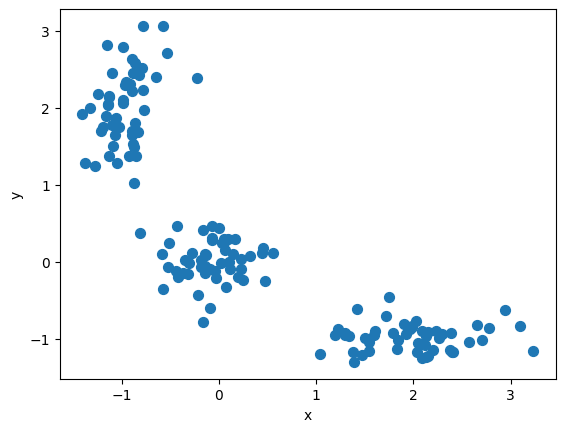

In [2]:
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

## DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

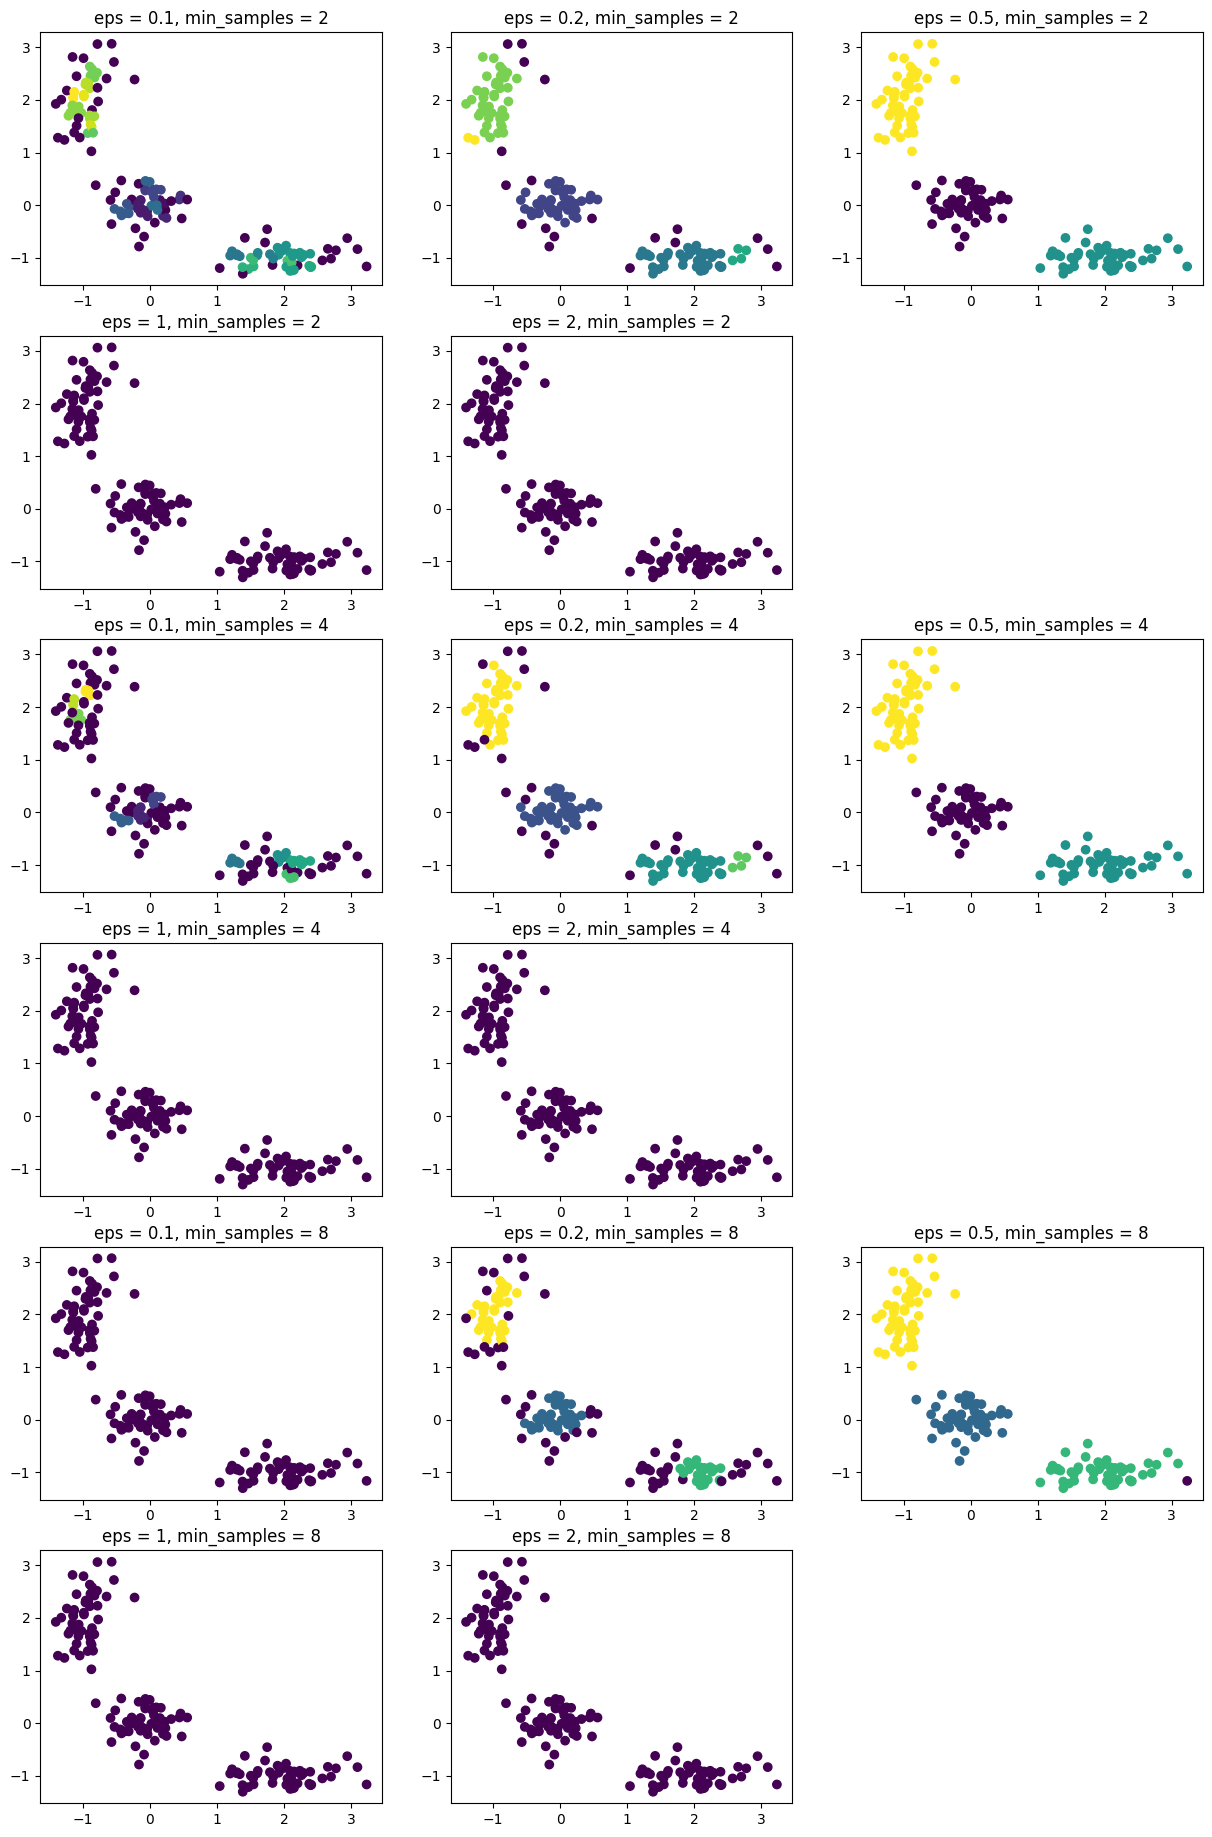

In [3]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()